### Problem 1 (10 Points)

Sketch graphically the problem 

$$
\begin{aligned}
\min_{x_1,x_2} & \quad f({\bf x})=(x_1+1)^2+(x_2-2)^2\\
{\text{subject to }} & \quad g_1 = x_1-2\leq 0,{\quad} g_3 = -x_1\leq 0,\\
& \quad g_2 = x_2-1\leq 0, {\quad} g_4 = -x_2\leq 0.
\end{aligned}
$$


Find the optimum graphically. Determine directions of feasible descent at the corner points of the feasible domain. Show the gradient directions of $f$ and $g_i$s at these points. Verify graphical results analytically using the KKT conditions.

![title](IMG-0068.PNG)

![title](IMG-0069.PNG)
![title](IMG-0070.PNG)

### Problem 2 (10 Points)

Graph the problem 

$$
\begin{aligned}
\min_{x_1,x_2} & \quad  f=-x_1\\
{\text{subject to }} & \quad g_1=x_2-(1-x_1)^3\leq 0{\quad} {\rm and}{\quad} x_2\geq 0.
\end{aligned}
$$ 

Find the solution graphically. Then apply the optimality conditions. Can you find a solution based on the optimality conditions? Why? (From Kuhn and Tucker, 1951.)

![title](IMG-0071.PNG)

![title](IMG-0072.PNG)




### Problem 3 (30 Points)

Find a local solution to the problem 

$$
\begin{aligned}
\min_{x_1,x_2,x_3} & \quad  f=x_1x_2+x_2x_3+x_1x_3\\
{\text{subject to }} & \quad h=x_1+x_2+x_3-3=0.
\end{aligned}
$$ 

Use two methods: reduced gradient and Lagrange multipliers.




![title](IMG-0073.PNG)

![title](IMG-0074.PNG)
![title](IMG-0075.PNG)






### Problem 4 (20 Points)

Use reduced gradient to	find the value(s) of the parameter $b$ for which the point $x_1=1$, $x_2=2$ is the solution to the problem 

$$
\begin{aligned}
\min_{x_1,x_2} & \quad  f=2x_{1} + bx_2\\
{\text{subject to }} & \quad g_1 = x_{1}^{2}+ x_{2}^{2}-5\leq 0\\
& \quad g_2= x_1- x_2-2\leq 0.
\end{aligned}
$$ 


![title](IMG-0076.PNG)
![title](IMG-0077.PNG)

### Problem 5 (30 Points)

Find the solution for 

$$
\begin{aligned}
\min_{x_1,x_2,x_3} & \quad  f=x_{1}^{2}+x_{2}^{2}+x_{3}^{2}\\
{\text{subject to }} & \quad h_1 = x_{1}^{2}/4+x_{2}^{2}/5+x_{3}^{2}/25-1=0\\
& \quad h_2 = x_1+x_2-x_3= 0,
\end{aligned}
$$ 

by implementing the generalized reduced gradient algorithm.

The series of error values are [1.0012402502718538, 1.1063475241302736, 0.11570814451453859, -0.47380452944895407, -1.2581854497952554, -2.178957654024931, -3.1976358421474336, -4.2609401064167365, -5.341290641766599, -6.427650694775581]
The local minima of the objective function  [-1.5739877   1.37736099 -0.19662671]


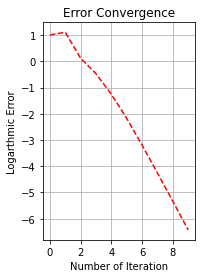

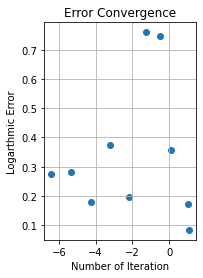

In [33]:
# Monish Dev Sudhakhar
# Question _5
# Generalized_Reduced_Gradient

import numpy as np
import math
from matplotlib import pyplot as plt

def objfun(x): # Ah, the star of the show.
    # Define Variable 1 as an Array
    x1=x[0]
    # Define Variable 2 as an Array
    x2=x[1]
    # Define Variable 3 as an Array
    x3=x[2]
    
    
    
    
    # Definition of Objective fucntion
    
    Objective_Function = x1**2+x2**2+x3**2
    return Objective_Function

#  Definition of the problem function

def Pfpd(x):
    return 2*x[0] 

def Pfps(x):
    return np.array([2*x[1], 2*x[2]])

def Phps(x):
    return np.array([[2/5*x[1], 2/25*x[2]],[1, -1]])

def Phpd(x):
    return np.array([[x[0]/2],[1]])



# Reduced Gradient Method

def Dfdd(x): 
    # Parameter of the fucntion, 
    # x1 = d; x2,x3=s
    
    
    return Pfpd(x) - np.matmul( np.matmul(Pfps(x), np.linalg.inv(Phps(x))), Phpd(x) )


# Linesearch Algorithm

def xeval(x,a,dfdd): 
    d_eval= (x[0]-a*dfdd)[0]
    s_eval= x[1:3] + a* np.transpose( np.matmul(  np.matmul(np.linalg.inv(Phps(x)) , Phpd(x) ), np.transpose([Dfdd(x)]) ) )[0]
    return np.append(d_eval,s_eval)

def linesearch(dfdd, x):
    a=1
    b=.5
    t=.3
    while objfun(xeval(x,a,dfdd)) > (objfun(x) - a*t* dfdd**2):
        a=b*a
    return a


# Line Search algorithm is carried out by defining the x value [dk, sk0] which is the search direction

def solve(x):  
    while np.linalg.norm(np.array([ [ x[0]**2/4 + x[1]**2/5 + x[2]**2/25 -1 ], [x[0]+x[1]-x[2] ] ]))  > e: # While |h| > e....
        phps=Phps(x)
        skj1= np.transpose( np.transpose([x[1:3]]) - np.matmul( np.linalg.inv(phps), np.array([ [ x[0]**2/4 + x[1]**2/5 + x[2]**2/25 -1 ], [x[0]+x[1]-x[2] ] ])   ))  # Step 2 of the solve algorithm, but transposing the output.
        x=np.append(x[0:1], np.transpose(skj1[0]))
    return x
        
            
        

x1=0
x3= 1/12 * ( (600-170*(x1**2))**(1/2) +10*x1)
x2= x3-x1

#  x2 and x3 are state variables
# x1 is the decision variable

x0=np.array([x1, x2, x3])  

e=10**(-3)

x_store=[x0]
ERROR=[]


while np.linalg.norm(Dfdd(x_store[-1])) > e:
    x=x_store[-1]
    dfdd=Dfdd(x)
    ERROR.append(math.log(np.linalg.norm(dfdd)))  
    a= linesearch(dfdd, x)
    dk= x[0]- a*dfdd
    sk0= x[1:3] + a* np.transpose(  np.matmul(np.matmul(np.linalg.inv(Phps(x)), Phpd(x)),  np.transpose(dfdd)) )
    xk0=np.append(dk,sk0)  
    #print('xk0 is ' +str(xk0))
    x = solve(xk0)
    x_store.append(x)
    
print ('The series of error values are '+str(ERROR))

print('The local minima of the objective function  ' + str(x_store[-1]))






# SERIES OF CONVERGENCE PLOTS 
N = 10
y = np.random.rand(N)
plt.subplot(1, 2, 1) # row 1, col 2 index 1
plt.plot(ERROR,"r--")
plt.title('Error Convergence')
plt.xlabel('Number of Iteration')
plt.ylabel('Logarthmic Error')
plt.grid()
plt.show()
plt.subplot(1, 2, 2) # row 1, col 2 index 2
plt.scatter(ERROR, y)
plt.title('Error Convergence')
plt.xlabel('Number of Iteration')
plt.ylabel('Logarthmic Error')
plt.grid()
plt.show()